The notebook performs exploratory data analysis (EDA) on the SGIJ dataset

In [114]:
import math
from datetime import date
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mysql.connector
from sklearn.cluster import KMeans
from sklearn import metrics

Connect to MySQL databasef from credentials

In [92]:
config = {
  'user': 'root',
  'password': 'thingtrack',
  'host': '127.0.0.1',
  'database': 'gaming',
  'raise_on_warnings': True
}

try:
  cnx = mysql.connector.connect(**config)
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)

Execute query and obtain dataset from database

In [216]:
# create dataset from database
cursor = cnx.cursor()

query = ("SELECT pl.birthdate, SUM(ac.profit) AS profit"
         " FROM player pl, account ac"
         " WHERE pl.operator_id = ac.operator_id"
         " AND pl.player_id = ac.player_id"
         " GROUP BY ac.operator_id, ac. player_id")

cursor.execute(query)

# return a list of tuples
result = list(cursor.fetchall())

Transform date attribute and create tuples

In [233]:
helper = np.vectorize(lambda x: datetime.combine(x, datetime.min.time()).timestamp())

X = []
for row in result:
    X.append([helper(row[0]), row[1]])

Show Age vs Profit Scatter Plot

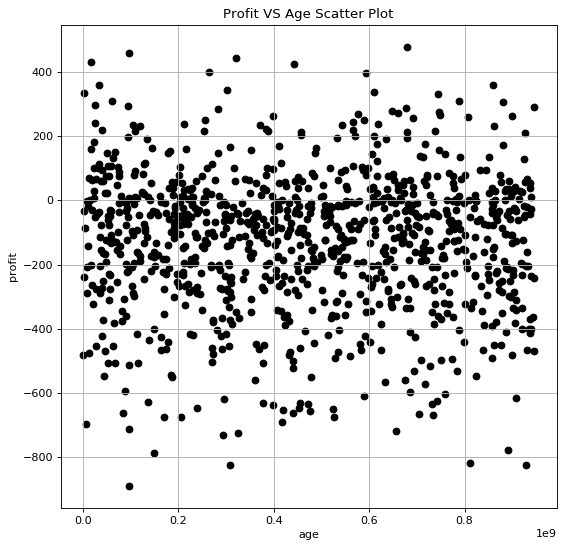

In [247]:
x, y = zip(*X)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x, y, color='k')
plt.title("Profit VS Age Scatter Plot")
plt.xlabel("age")
plt.ylabel("profit")
plt.grid()
plt.show()

In [253]:
model = KMeans(n_clusters=2).fit(X)

In [254]:
print(model.cluster_centers_)


[[ 7.08544461e+08 -1.28541082e+02]
 [ 2.28696575e+08 -1.31379242e+02]]


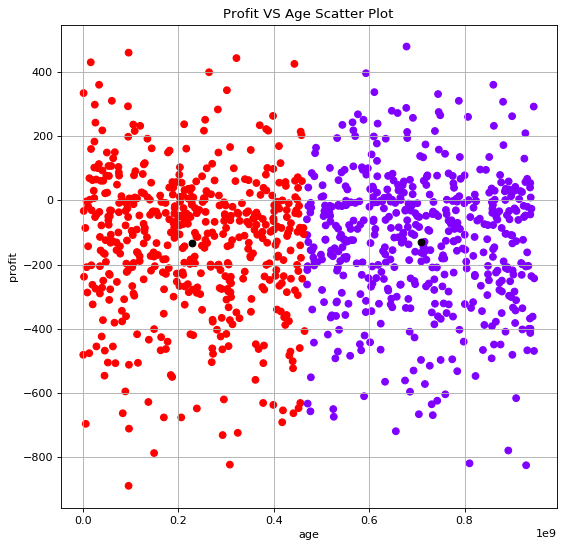

In [257]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x, y, c=model.labels_, cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1], color='black')
plt.title("Profit VS Age Scatter Plot")
plt.xlabel("age")
plt.ylabel("profit")
plt.grid()
plt.show()